In [128]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(rc = {'figure.figsize':(12,10)})
sns.set(font_scale = 2)
import matplotlib.pyplot as plt
from sklearn import ensemble
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [2]:
df = pd.read_csv('data/data_final_w_lagged_targets_kpl.csv')

In [3]:
df

,year,zipcode,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,...,gen_rank,CSBA,permits_total,permits_multifamilies,permits_singlefamily,rent_in_1y,rent_in_2y,rent_in_3y,rent_in_4y,rent_in_5y
0,2013,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,0.038311,0.146598,0.098579,0.126137,...,533.000000,41860.0,10922.0,7263.0,3659.0,4123.250000,4520.250000,4492.916667,4231.416667,4245.916667
1,2014,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4123.250000,0.028940,0.141141,0.097703,0.127501,...,254.333333,41860.0,10001.0,6285.0,3716.0,4520.250000,4492.916667,4231.416667,4245.916667,4421.083333
2,2015,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4520.250000,0.029400,0.135949,0.105821,0.123141,...,239.666667,41860.0,13386.0,8582.0,4804.0,4492.916667,4231.416667,4245.916667,4421.083333,4406.000000
3,2016,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4492.916667,0.027901,0.146379,0.105018,0.120388,...,303.333333,41860.0,14787.0,9820.0,4967.0,4231.416667,4245.916667,4421.083333,4406.000000,NaN
4,2017,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4231.416667,0.026190,0.131302,0.108329,0.122007,...,346.666667,41860.0,16952.0,12175.0,4777.0,4245.916667,4421.083333,4406.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,2014,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1186.333333,0.044218,0.000000,0.000000,0.214286,...,NaN,40140.0,10166.0,2944.0,7222.0,1238.666667,1308.666667,1414.833333,1456.000000,1332.454545
4580,2015,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1238.666667,0.045296,0.000000,0.000000,0.216028,...,NaN,40140.0,9926.0,2110.0,7816.0,1308.666667,1414.833333,1456.000000,1332.454545,1356.000000
4581,2016,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1308.666667,0.051948,0.000000,0.000000,0.207792,...,NaN,40140.0,10921.0,2084.0,8837.0,1414.833333,1456.000000,1332.454545,1356.000000,NaN
4582,2017,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1414.833333,0.056034,0.000000,0.000000,0.176724,...,NaN,40140.0,14676.0,3721.0,10955.0,1456.000000,1332.454545,1356.000000,NaN,NaN


In [6]:
df = df.drop(columns=['zipcode', 'City', 'CountyName', 'Metro', 'CSBA',
                       'rent_in_2y', 'rent_in_3y', 'rent_in_4y', 'rent_in_5y'])
df.isna().sum().sort_values(ascending=False).head(10)

Mortgage_interest_paid_amount       60
N_returns_real_estate_taxes         60
Real_estate_taxes_amount            60
N_returns_mortgage_interest_paid    60
gen_rank                            12
rent_in_1y                           5
gini_index_pct_change                2
rank_gini_index                      2
commuters_walked_to_work             0
other_race_pop                       0
dtype: int64

In [7]:
df = df.dropna()
df

,year,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,female_64_over,male_19_under,male_20_to_29,male_30_to_39,...,Real_estate_taxes_amount,N_returns_mortgage_interest_paid,Mortgage_interest_paid_amount,rank_gini_index,gini_index_pct_change,gen_rank,permits_total,permits_multifamilies,permits_singlefamily,rent_in_1y
0,2013,3747.083333,0.038311,0.146598,0.098579,0.126137,0.088690,0.036762,0.108071,0.115852,...,36728.0,3260.0,48733.0,681.0,-0.025946,533.000000,10922.0,7263.0,3659.0,4123.250000
1,2014,4123.250000,0.028940,0.141141,0.097703,0.127501,0.080996,0.036938,0.109005,0.130222,...,39773.0,3190.0,47822.0,474.0,0.000750,254.333333,10001.0,6285.0,3716.0,4520.250000
2,2015,4520.250000,0.029400,0.135949,0.105821,0.123141,0.082728,0.035919,0.106443,0.137299,...,43679.0,3230.0,48895.0,315.0,0.010684,239.666667,13386.0,8582.0,4804.0,4492.916667
3,2016,4492.916667,0.027901,0.146379,0.105018,0.120388,0.084793,0.033846,0.103072,0.138453,...,48090.0,3210.0,47713.0,299.0,0.010200,303.333333,14787.0,9820.0,4967.0,4231.416667
4,2017,4231.416667,0.026190,0.131302,0.108329,0.122007,0.085002,0.039514,0.099599,0.146801,...,59023.0,3370.0,51307.0,578.0,-0.013035,346.666667,16952.0,12175.0,4777.0,4245.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,2016,1044.416667,0.119136,0.054938,0.056173,0.156790,0.082099,0.196296,0.043827,0.040741,...,88.0,40.0,182.0,698.0,-0.028363,663.000000,10921.0,2084.0,8837.0,1036.700000
4558,2017,1036.700000,0.143990,0.052471,0.065284,0.150092,0.086638,0.164124,0.045149,0.037828,...,92.0,50.0,185.0,56.0,0.036489,481.666667,14676.0,3721.0,10955.0,1170.500000
4559,2018,1170.500000,0.128265,0.032501,0.060360,0.174115,0.089379,0.174695,0.039466,0.048752,...,0.0,0.0,0.0,760.0,-0.103462,509.333333,14809.0,3218.0,11591.0,1216.727273
4563,2016,2043.272727,0.129243,0.079634,0.066580,0.218016,0.057441,0.159269,0.000000,0.060052,...,661.0,80.0,958.0,762.0,-0.088000,651.000000,7204.0,1069.0,6135.0,2094.800000


In [9]:
X = df.drop(columns='rent_in_1y')
y = df.rent_in_1y

In [10]:
max_vif = np.inf
X_new = X.copy()
while max_vif > 5:
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
    vif["features"] = X_new.columns
    max_vif = vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True).loc[0, 'VIF Factor']
    max_feat = vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True).loc[0, 'features']
    if max_vif > 5:
        print('Removing ' + max_feat + ' with vif = ' + str(max_vif))
        X_new = X_new.drop(columns=max_feat)
X_vif5 = X_new.copy()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Removing permits_singlefamily with vif = inf
Removing households with vif = inf
Removing year with vif = 173856.10924083422
Removing dwellings_1_unit with vif = 5031.529284943583
Removing N_returns_real_estate_taxes with vif = 1047.982175935012
Removing white_pop with vif = 741.9035182728466
Removing permits_total with vif = 155.133342825175
Removing female_40_to_64 with vif = 114.2054142895253
Removing Mortgage_interest_paid_amount with vif = 106.73598990807045
Removing income_40000_99999 with vif = 87.15325095382833
Removing housing_units with vif = 79.80561517303488
Removing male_19_under with vif = 77.26949408049708
Removing commute_30_mins_less with vif = 69.92486854643509
Removing degree_bachelors with vif = 65.49968871331005
Removing female_30_to_39 with vif = 56.37883258326755
Removing avg_rent with vif = 51.20123192670315
Removing male_64_over with vif = 44.834674602518675
Removing income_100000_199999 with vif = 40.4029974624799
Removing female_19_under with vif = 39.50706707

In [11]:
X_vif5

,commute_30_to_59,commute_60_more_mins,income_200000_or_more,mobile_homes,vacant_housing_units,vacant_housing_units_for_rent,amerindian_pop,asian_pop,black_pop,other_race_pop,dwellings_50_or_more_units,commuters_by_public_transportation,commuters_walked_to_work,households_public_asst_or_food_stamps,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,Real_estate_taxes_amount,gini_index_pct_change,permits_multifamilies
0,0.179956,0.064014,0.070282,0.001031,0.094573,0.029824,0.000522,0.279346,0.033592,0.015526,0.278480,0.225616,0.146130,0.050412,0.603528,0.032754,0.000434,36728.0,-0.025946,7263.0
1,0.185181,0.069438,0.077527,0.000550,0.093502,0.023603,0.000292,0.271838,0.040553,0.010572,0.282185,0.232818,0.151987,0.057992,0.592017,0.038842,0.000413,39773.0,0.000750,6285.0
2,0.192102,0.075516,0.080703,0.000459,0.089852,0.018192,0.000231,0.267209,0.041604,0.009344,0.284885,0.226582,0.156556,0.056226,0.047746,0.002969,0.000270,43679.0,0.010684,8582.0
3,0.200646,0.078795,0.092433,0.000430,0.094035,0.025758,0.000589,0.258930,0.039897,0.006159,0.294432,0.232314,0.160874,0.055559,0.051033,0.004781,0.002471,48090.0,0.010200,9820.0
4,0.210702,0.073091,0.109760,0.000406,0.102923,0.030639,0.000424,0.255854,0.040115,0.006309,0.284296,0.230017,0.177161,0.052332,0.046946,0.007464,0.002380,59023.0,-0.013035,12175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,0.054321,0.014198,0.008642,0.019943,0.332384,0.011396,0.002469,0.004321,0.056790,0.000000,0.008547,0.000000,0.009259,0.162162,0.207028,0.000000,0.000000,88.0,-0.028363,2084.0
4558,0.059793,0.006101,0.012813,0.019380,0.296512,0.011628,0.003661,0.003051,0.061623,0.000000,0.004845,0.003051,0.009762,0.246556,0.236434,0.000000,0.000000,92.0,0.036489,3721.0
4559,0.000000,0.011027,0.004063,0.014098,0.289474,0.010338,0.002322,0.022055,0.051654,0.000000,0.005639,0.002902,0.009286,0.189153,0.209586,0.000000,0.000000,0.0,-0.103462,3218.0
4563,0.189295,0.000000,0.024804,0.000000,0.855561,0.007383,0.101828,0.011749,0.000000,0.000000,0.000000,0.018277,0.006527,0.047923,0.074758,0.000000,0.000000,661.0,-0.088000,1069.0


In [12]:
# Same procedure as above, except not removing avg_rent
max_vif = np.inf
X_new = X.copy()
while max_vif > 5:
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
    vif["features"] = X_new.columns
    max_vif = vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True).loc[0, 'VIF Factor']
    max_feat = vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True).loc[0, 'features']
    if max_vif > 5:
        if max_feat != 'avg_rent':
            print('Removing ' + max_feat + ' with vif = ' + str(max_vif))
            X_new = X_new.drop(columns=max_feat)
        else:
            max_vif = vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True).loc[1, 'VIF Factor']
            max_feat = vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True).loc[1, 'features']
            print('*Removing ' + max_feat + ' with vif = ' + str(max_vif))
            X_new = X_new.drop(columns=max_feat)
X_vif5_rent = X_new.copy()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Removing permits_singlefamily with vif = inf
Removing households with vif = inf
Removing year with vif = 173856.10924083422
Removing dwellings_1_unit with vif = 5031.529284943583
Removing N_returns_real_estate_taxes with vif = 1047.982175935012
Removing white_pop with vif = 741.9035182728466
Removing permits_total with vif = 155.133342825175
Removing female_40_to_64 with vif = 114.2054142895253
Removing Mortgage_interest_paid_amount with vif = 106.73598990807045
Removing income_40000_99999 with vif = 87.15325095382833
Removing housing_units with vif = 79.80561517303488
Removing male_19_under with vif = 77.26949408049708
Removing commute_30_mins_less with vif = 69.92486854643509
Removing degree_bachelors with vif = 65.49968871331005
Removing female_30_to_39 with vif = 56.37883258326755
*Removing male_64_over with vif = 45.95687973882974
*Removing income_100000_199999 with vif = 41.51702216037253
*Removing female_19_under with vif = 40.59428536970868
*Removing income_10000_39999 with vif

In [14]:
vif

,VIF Factor,features
0,11.357391,avg_rent
1,4.747595,commute_30_to_59
2,1.742327,mobile_homes
3,2.498552,vacant_housing_units
4,3.642599,vacant_housing_units_for_rent
5,1.415308,amerindian_pop
6,2.518178,asian_pop
7,1.702590,black_pop
8,3.186862,hispanic_pop
9,1.774899,other_race_pop


In [15]:
# Same procedure as above, except removing avg_rent before beginning procedure and then adding it back in. 
max_vif = np.inf
X_new = X.copy()
X_new = X_new.drop(columns='avg_rent')
while max_vif > 5:
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
    vif["features"] = X_new.columns
    max_vif = vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True).loc[0, 'VIF Factor']
    max_feat = vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True).loc[0, 'features']
    if max_vif > 5:
        print('Removing ' + max_feat + ' with vif = ' + str(max_vif))
        X_new = X_new.drop(columns=max_feat)
X_vif5_no_rent = X_new.copy()
X_vif5_repl_rent = X_new.copy()
X_vif5_repl_rent['avg_rent'] = X.avg_rent

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Removing permits_singlefamily with vif = inf
Removing households with vif = inf
Removing year with vif = 173782.49712093553
Removing dwellings_1_unit with vif = 4941.1844885211285
Removing N_returns_real_estate_taxes with vif = 1040.4184668129199
Removing white_pop with vif = 739.4054033988422
Removing permits_total with vif = 153.4133864023178
Removing Mortgage_interest_paid_amount with vif = 109.14850360347943
Removing female_40_to_64 with vif = 106.43368177142632
Removing income_40000_99999 with vif = 86.96254149203592
Removing housing_units with vif = 79.71166664245499
Removing male_19_under with vif = 77.13856287745085
Removing commute_30_mins_less with vif = 69.832323613057
Removing degree_bachelors with vif = 65.49818740119976
Removing female_30_to_39 with vif = 55.98479937126643
Removing male_64_over with vif = 44.834674602518675
Removing income_100000_199999 with vif = 40.4029974624799
Removing female_19_under with vif = 39.507067078064274
Removing income_10000_39999 with vif 

In [18]:
X_vif5_no_rent.columns == X_vif5.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
# So it seems it doesn't make a difference whether I remove avg_rent before starting the procedure or not. 
# This doesn't actually change the result. I will still use the same feature sets: X_vif5, X_vif5_rent, X_full
# This is the same and the feature sets I had decided on last night

# I have 20 minutes. Let's train a linear model, random forest model, and catboost model real quick. 
# Shouldn't be an issue

In [43]:
X_vif5_rent = X_vif5_repl_rent.copy()
X_full = X.copy()
X_full.to_csv('full_w_54_features.csv')
X_vif5.to_csv('vif5_w_20_features.csv')
X_vif5_rent.to_csv('vif5_w_rent_21_features.csv')

# Linear Models

In [157]:
# Let's train linear models for both X, X_vif5, X_vif5_rent
mlr = LinearRegression()
mlr_full = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_full.append(mlr.score(X_test, y_test))

In [24]:
mlr = LinearRegression()
mlr_vif5 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_vif5, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_vif5.append(mlr.score(X_test, y_test))

In [155]:
mlr = LinearRegression()
mlr_vif5_rent = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_vif5_rent, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_vif5_rent.append(mlr.score(X_test, y_test))

<AxesSubplot:xlabel='score', ylabel='Density'>

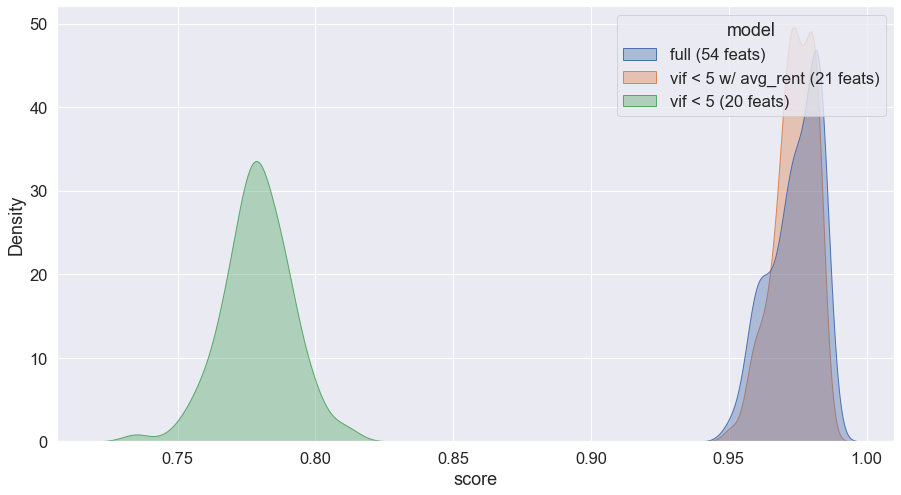

In [161]:
scores = pd.concat([pd.DataFrame({'score':mlr_full, 'model':'full (54 feats)'})
                    ,pd.DataFrame({'score':mlr_vif5_rent,'model':'vif < 5 w/ avg_rent (21 feats)'})
                    ,pd.DataFrame({'score':mlr_vif5,'model':'vif < 5 (20 feats)'})
                   ])
sns.set(font_scale = 1.5)
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

In [163]:
print(np.mean(mlr_full))
print(np.mean(mlr_vif5))
print(np.mean(mlr_vif5_rent))

0.973958102527242
0.7788952136796665
0.9736997130349911


In [153]:
for feat in [x for x in list(X.columns) if x not in list(X_vif5_rent.columns)]:
    print(feat)

year
female_19_under
female_20_to_29
female_30_to_39
female_40_to_64
female_64_over
male_19_under
male_20_to_29
male_30_to_39
male_40_to_64
male_64_over
commute_30_mins_less
income_less_10000
income_10000_39999
income_40000_99999
income_100000_199999
degree_associates
degree_bachelors
degree_graduate_professional
unemployed_pop
housing_units
hispanic_pop
white_pop
dwellings_1_unit
dwellings_2_to_49_units
households
N_returns_real_estate_taxes
N_returns_mortgage_interest_paid
Mortgage_interest_paid_amount
rank_gini_index
gen_rank
permits_total
permits_singlefamily


# Random Forest

In [165]:
model = ensemble.RandomForestRegressor()
rf_full = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    model.fit(X_train, y_train)
    rf_full.append(model.score(X_test, y_test))

In [166]:
rf_vif5 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_vif5, y, test_size = 0.25)
    model.fit(X_train, y_train)
    rf_vif5.append(model.score(X_test, y_test))

In [167]:
rf_vif5_rent = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_vif5_rent, y, test_size = 0.25)
    model.fit(X_train, y_train)
    rf_vif5_rent.append(model.score(X_test, y_test))

<AxesSubplot:xlabel='score', ylabel='Density'>

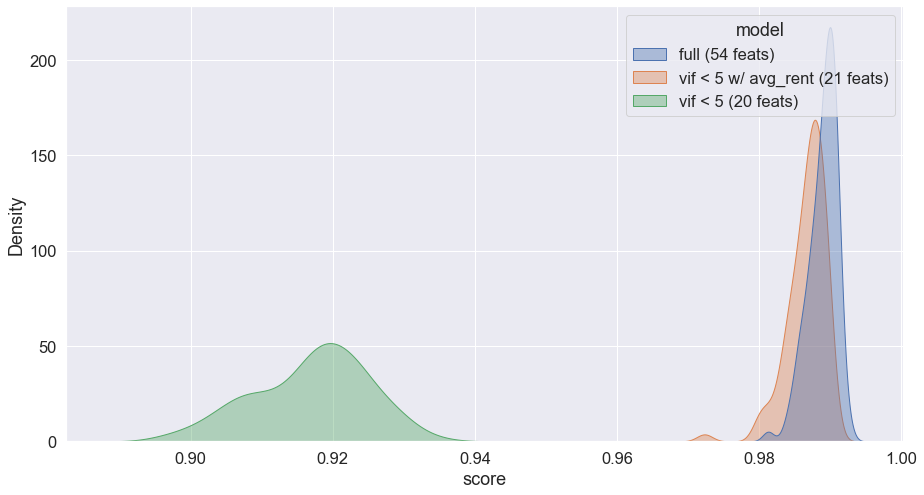

In [171]:
scores = pd.concat([pd.DataFrame({'score':rf_full,'model':'full (54 feats)'})
                    ,pd.DataFrame({'score':rf_vif5_rent,'model':'vif < 5 w/ avg_rent (21 feats)'})
                    ,pd.DataFrame({'score':rf_vif5,'model':'vif < 5 (20 feats)'})
                   ])
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.5)
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

In [169]:
print(np.mean(rf_full))
print(np.mean(rf_vif5))
print(np.mean(rf_vif5_rent))

0.9888725521436897
0.9169330555094802
0.9865903926206978


# Catboost

In [39]:
model = CatBoostRegressor(silent=True)
scores_full = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    model.fit(X_train, y_train)
    scores_full.append(model.score(X_test, y_test))

In [40]:
scores_vif5 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_vif5, y, test_size = 0.25)
    model.fit(X_train, y_train)
    scores_vif5.append(model.score(X_test, y_test))

In [41]:
scores_vif5_rent = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_vif5_rent, y, test_size = 0.25)
    model.fit(X_train, y_train)
    scores_vif5_rent.append(model.score(X_test, y_test))

<AxesSubplot:xlabel='score', ylabel='Density'>

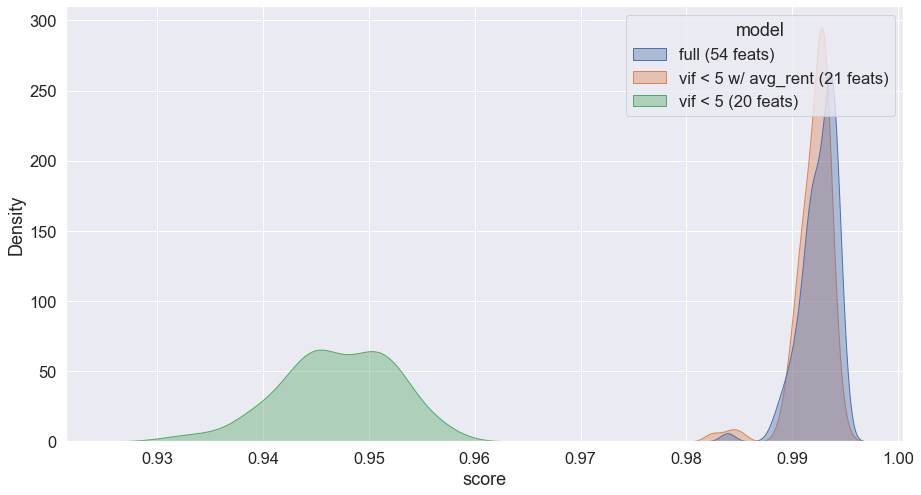

In [164]:
scores = pd.concat([pd.DataFrame({'score':scores_full,'model':'full (54 feats)'})
                    ,pd.DataFrame({'score':scores_vif5_rent,'model':'vif < 5 w/ avg_rent (21 feats)'})
                    ,pd.DataFrame({'score':scores_vif5,'model':'vif < 5 (20 feats)'})
                   ])
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.5)
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

In [168]:
print(np.mean(scores_full))
print(np.mean(scores_vif5))
print(np.mean(scores_vif5_rent))

0.9924543888928998
0.9470286091562053
0.9919457999215363


# 2019 Forecasts

In [174]:
df_2018 = df[df.year == 2018]
df_13to17 = df[df.year != 2018]

In [175]:
vif5_feats = list(X_vif5.columns)
vif5_rent_feats = list(X_vif5_rent.columns)

In [176]:
X_test_full = df_2018.drop(columns = 'rent_in_1y')
X_test_vif5 = df_2018[vif5_feats]
X_test_vif5_rent = df_2018[vif5_rent_feats]
y_test = df_2018.rent_in_1y

In [177]:
X_train_full = df_13to17.drop(columns = 'rent_in_1y')
X_train_vif5 = df_13to17[vif5_feats]
X_train_vif5_rent = df_13to17[vif5_rent_feats]
y_train = df_13to17.rent_in_1y

### Linear models

In [136]:
model = LinearRegression()
X_train = X_train_full
X_test = X_test_full
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
print("The training rmse: %.5f" % (np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print("The test     rmse: %.5f" % (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

The training r2: 0.97805
The test     r2: 0.96197
The training rmse: 123.43367
The test     rmse: 149.35870


In [137]:
X_train = X_train_vif5
X_test = X_test_vif5
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
print("The training rmse: %.5f" % (np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print("The test     rmse: %.5f" % (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

The training r2: 0.78235
The test     r2: 0.76499
The training rmse: 388.70134
The test     rmse: 371.30190


In [138]:
X_train = X_train_vif5_rent
X_test = X_test_vif5_rent
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
print("The training rmse: %.5f" % (np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print("The test     rmse: %.5f" % (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

The training r2: 0.97576
The test     r2: 0.96481
The training rmse: 129.72737
The test     rmse: 143.67629


### Random forest models

In [188]:
sns.set(rc = {'figure.figsize':(5,10)})
sns.set(font_scale = 2)

The training r2: 0.99851
The test     r2: 0.98587
The training rmse: 32.14859
The test     rmse: 91.05736


<BarContainer object of 15 artists>

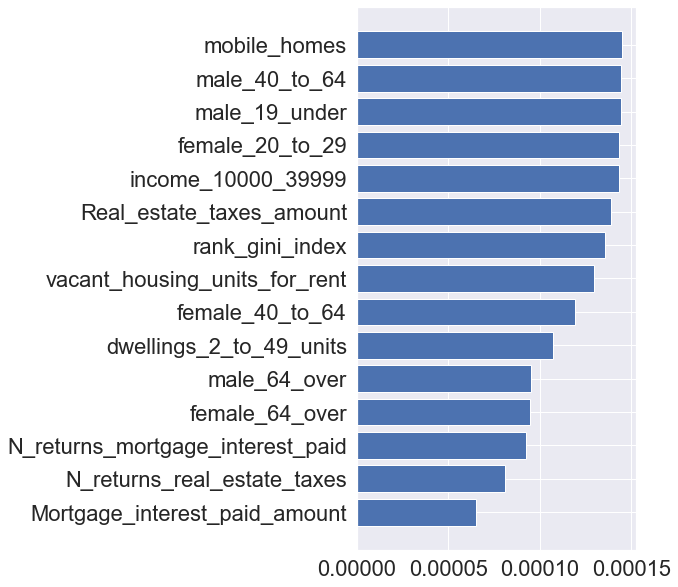

In [189]:
model = ensemble.RandomForestRegressor()
X_train = X_train_full
X_test = X_test_full
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
print("The training rmse: %.5f" % (np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print("The test     rmse: %.5f" % (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx][:15], model.feature_importances_[sorted_idx][:15])

The training r2: 0.98949
The test     r2: 0.82139
The training rmse: 85.42093
The test     rmse: 323.69778


<BarContainer object of 15 artists>

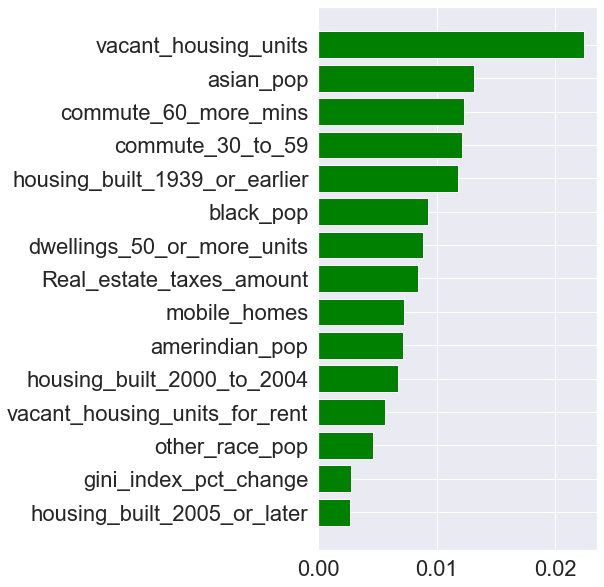

In [190]:
X_train = X_train_vif5
X_test = X_test_vif5
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
print("The training rmse: %.5f" % (np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print("The test     rmse: %.5f" % (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx][:15], model.feature_importances_[sorted_idx][:15], color='green')

The training r2: 0.99822
The test     r2: 0.98239
The training rmse: 35.11209
The test     rmse: 101.65421


<BarContainer object of 15 artists>

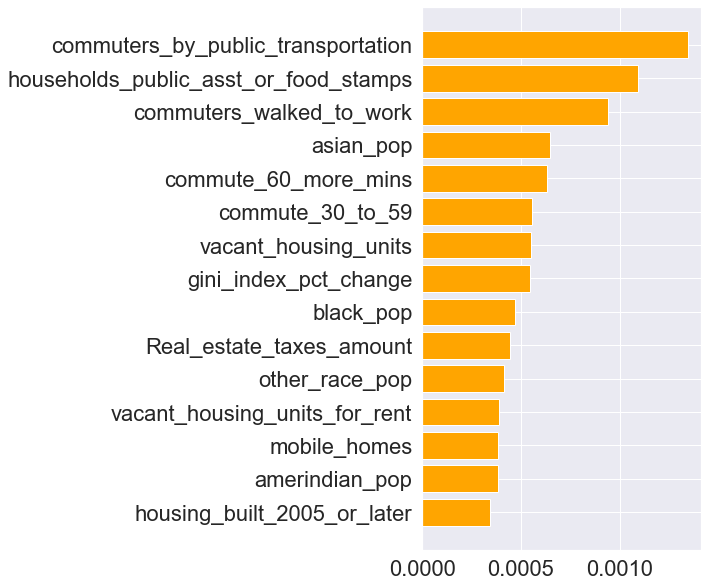

In [191]:
X_train = X_train_vif5_rent
X_test = X_test_vif5_rent
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
print("The training rmse: %.5f" % (np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print("The test     rmse: %.5f" % (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx][:15], model.feature_importances_[sorted_idx][:15], color='orange')

### Catboost models

In [183]:
sns.set(rc = {'figure.figsize':(5,10)})
sns.set(font_scale = 2)

The training r2: 0.99921
The test     r2: 0.98399
The training rmse: 23.45759
The test     rmse: 96.91630


<BarContainer object of 15 artists>

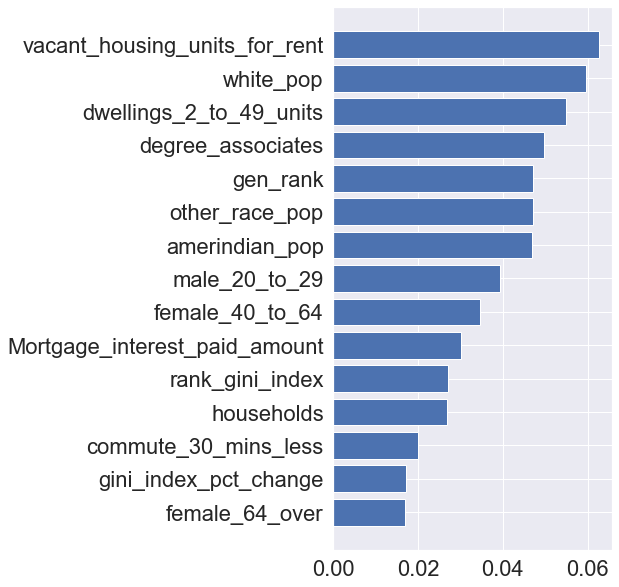

In [184]:
model = CatBoostRegressor(silent=True)
X_train = X_train_full
X_test = X_test_full
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
print("The training rmse: %.5f" % (np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print("The test     rmse: %.5f" % (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx][:15], model.feature_importances_[sorted_idx][:15])

The training r2: 0.99269
The test     r2: 0.90450
The training rmse: 71.21437
The test     rmse: 236.69102


<BarContainer object of 15 artists>

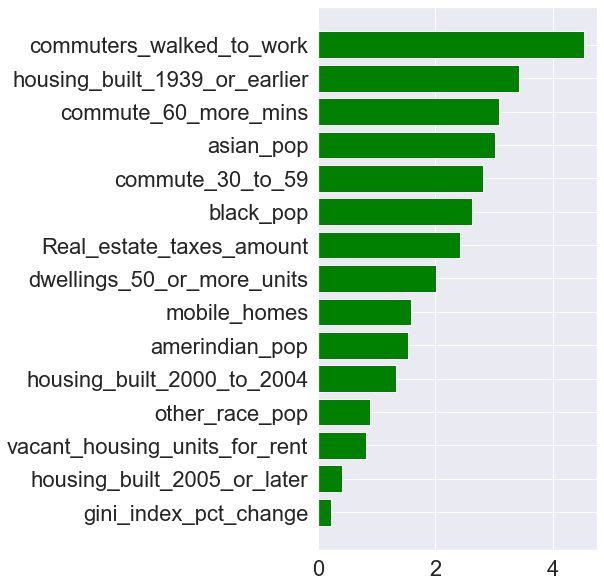

In [186]:
X_train = X_train_vif5
X_test = X_test_vif5
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
print("The training rmse: %.5f" % (np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print("The test     rmse: %.5f" % (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx][:15], model.feature_importances_[sorted_idx][:15], color='green')

The training r2: 0.99886
The test     r2: 0.97496
The training rmse: 28.08426
The test     rmse: 121.20002


<BarContainer object of 15 artists>

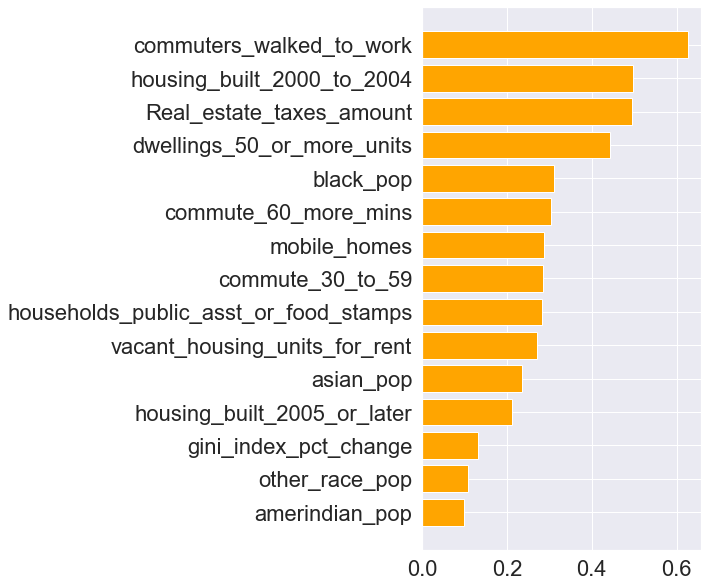

In [187]:
X_train = X_train_vif5_rent
X_test = X_test_vif5_rent
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))
print("The training rmse: %.5f" % (np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print("The test     rmse: %.5f" % (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx][:15], model.feature_importances_[sorted_idx][:15], color='orange')